In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [12]:
import numpy as np

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [14]:
register_matplotlib_converters()
%matplotlib notebook

In [15]:
df_name_list = ['df_price07_18', 'df_askhi07_18', 'df_returns07_18']
df_list = []


### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


for name in df_name_list:
    file_name = '{}.csv'.format(name)
    key_path = key_location + '/' + file_name

    ### INSTANTIATE DATAFRAME
    csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')

    temp_df = pd.read_csv(StringIO(csv_string))
    temp_df.index = temp_df['Unnamed: 0']
    temp_df = temp_df.drop('Unnamed: 0', axis=1)
    temp_df.index.names = ['date']


    #df_bidlo.head()
    #### TRANSPOSE DATA FOR EASE OF USE
    temp_df = temp_df.T
    temp_df.index = pd.to_datetime(temp_df.index)
    df_list.append(temp_df)
    print('{} added to df_list'.format(name))
    
    
df_price = df_list[0]
df_askhi = df_list[1]
df_returns = df_list[2]
df_price_askhi = df_price/df_askhi
df_price_askhi.head()

df_price07_18 added to df_list
df_askhi07_18 added to df_list
df_returns07_18 added to df_list


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,0.984814,0.987107,0.989189,0.987087,0.978632,0.982286,0.983036,0.993863,0.985877,0.993634,...,0.973810,0.991766,0.967427,0.963071,0.996885,0.968069,0.996806,0.998972,0.988427,0.990518
2007-01-04,0.989368,0.994661,0.996330,0.997125,0.993456,0.998105,0.999355,0.997947,0.991745,0.994647,...,0.988597,0.994633,0.998302,0.987781,0.992985,0.941541,0.981033,0.958383,0.990515,0.980177
2007-01-05,0.993243,0.996303,0.993100,0.989803,0.998432,0.992621,0.980587,0.993617,0.992853,0.985924,...,0.984331,0.983360,0.990575,0.991390,0.989581,0.990229,0.993334,0.979535,0.984395,0.987787
2007-01-08,0.996096,0.994352,0.997660,0.997114,0.998128,0.996589,0.987789,0.997945,0.993936,0.995812,...,0.994961,0.986400,0.996822,0.996137,0.996058,0.983051,0.989221,0.992369,1.000000,0.997331
2007-01-09,0.991101,0.992710,0.990534,0.998015,0.976839,0.993783,0.997360,0.995495,0.997250,0.996449,...,0.990706,0.998058,0.987441,0.997347,0.996593,0.992674,0.981688,0.991182,0.986275,0.983621


### Dictionary of Positive/Negative Returns for each stock

In [17]:
high_returns = {}
low_returns = {}

for symbol in df_returns.columns:
    temp_series = df_returns[symbol]
    temp_series_high = temp_series[temp_series>0.0]
    temp_series_low = temp_series[temp_series<=-0.0]    
    high_returns[symbol] = temp_series_high
    low_returns[symbol] = temp_series_low


print(len(high_returns), len(low_returns))    
print(len(high_returns['ORCL_ORACLE CORP']), len(low_returns['ORCL_ORACLE CORP']))

388 388
1555 1465


### What are the dates of those returns?

In [18]:
pa_high_returns = {}
pa_low_returns = {}
for symbol in df_returns.columns:
    temp_high = high_returns[symbol]
    temp_low = low_returns[symbol]
    
    temp_high = pd.merge(temp_high, df_price_askhi[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
    temp_low = pd.merge(temp_low, df_price_askhi[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
    
    pa_high_returns[symbol] = temp_high
    pa_low_returns[symbol] = temp_low

print(len(pa_high_returns['ADM_ARCHER DANIELS MIDLAND CO']), len(pa_low_returns['ADM_ARCHER DANIELS MIDLAND CO']))

1573 1447


### Dictionary of Correlations

In [42]:
# cor_high = {}
# cor_low = {}
corrs = {}
for symbol in df_returns.columns:
    ret_high = high_returns[symbol]
    pa_high = pa_high_returns[symbol]

    ret_low = low_returns[symbol]
    pa_low = pa_low_returns[symbol]    
    
    temp_corr_high = np.corrcoef(ret_high, pa_high)[0, 1]
    temp_corr_low = np.corrcoef(ret_low, pa_low)[0, 1]    
    corrs[symbol] = [temp_corr_high, temp_corr_low]
    #cor_low[symbol] = [temp_corr_low, temp_corr_low]


corrs['ADM_ARCHER DANIELS MIDLAND CO']

[-0.047690388314412746, 0.8056011536556914]

In [49]:
# plt.scatter(low_returns['ADM_ARCHER DANIELS MIDLAND CO'], pa_low_returns['ADM_ARCHER DANIELS MIDLAND CO'])
# temp_cor = np.corrcoef(low_returns['ADM_ARCHER DANIELS MIDLAND CO'], pa_low_returns['ADM_ARCHER DANIELS MIDLAND CO'])
# plt.title('{}'.format(temp_cor))
# plt.show()

### Distribution of Correleations

<IPython.core.display.Javascript object>


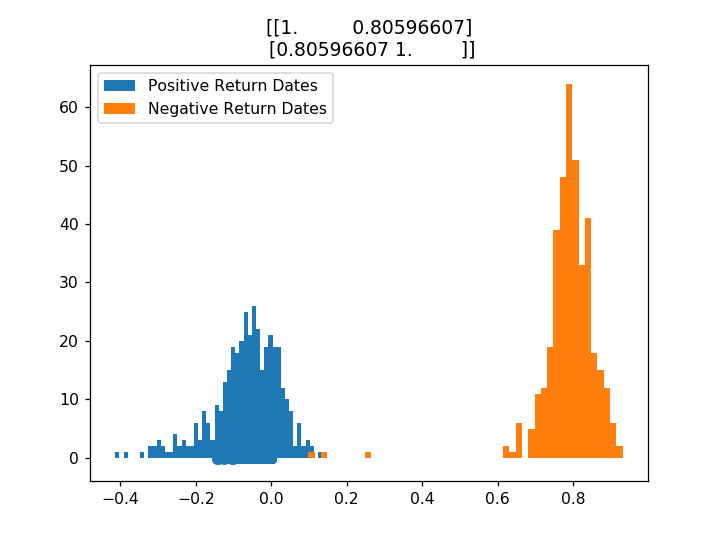

In [43]:
high_corrs = []
low_corrs = []
for key, value in corrs.items():
    high_corrs.append(value[0])
    low_corrs.append(value[1])
    
plt.hist(high_corrs, label='Positive Return Dates', bins=50)
plt.hist(low_corrs, label='Negative Return Dates', bins=50)
plt.legend()
plt.show()

### loop over return thresholds

In [9]:
cutoff_list = np.arange(0,0.1, 0.01)
cutoff_list.reshape(2,5)

array([[0.  , 0.01, 0.02, 0.03, 0.04],
       [0.05, 0.06, 0.07, 0.08, 0.09]])

In [56]:
#corr_dataframe = pd.DataFrame()
cutoff_list = np.arange(0,0.1, 0.01)
nrows = 2
ncols = 5
temp_matrix = cutoff_list.reshape(nrows,ncols)


fig, ax = plt.subplots(nrows,ncols, figsize=(20,8))
for k in range(nrows):
    for l in range(ncols):
        ## indices
        temp_idx = temp_matrix[k,l]                                              
#for r_cutoff in cutoff_list:
        ### Dictionary of Positive/Negative Returns for each stock
        high_returns = {}
        low_returns = {}
        for symbol in df_returns.columns:
            temp_series = df_returns[symbol]
            temp_series_high = temp_series[temp_series>temp_idx]
            temp_series_low = temp_series[temp_series<=-temp_idx]    
            high_returns[symbol] = temp_series_high
            low_returns[symbol] = temp_series_low


        ### what are the dates of those returns?
        pa_high_returns = {}
        pa_low_returns = {}
        for symbol in df_returns.columns:
            temp_high = high_returns[symbol]
            temp_low = low_returns[symbol]

            temp_high = pd.merge(temp_high, df_price_askhi[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
            temp_low = pd.merge(temp_low, df_price_askhi[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]

            pa_high_returns[symbol] = temp_high
            pa_low_returns[symbol] = temp_low

        ### Dictionary of Correlations
        corrs = {}
        for symbol in df_returns.columns:
            ret_high = high_returns[symbol]
            pa_high = vs_high_returns[symbol]

            ret_low = low_returns[symbol]
            pa_low = vs_low_returns[symbol]    

            temp_corr_high = np.corrcoef(ret_high, pa_high)[0, 1]
            temp_corr_low = np.corrcoef(ret_low, pa_low)[0, 1]    
            corrs[symbol] = [temp_corr_high, temp_corr_low]

        high_corrs = []
        low_corrs = []
        for key, value in corrs.items():
            high_corrs.append(value[0])
            low_corrs.append(value[1])

        ### plot the histogram
        ax[k,l].hist(high_corrs, label='Positive Return Dates', bins=50, alpha=0.7)
        ax[k,l].hist(low_corrs, label='Negative Return Dates', bins=50, alpha=0.7)
        ax[k,l].set_title('Return Threshold: {}'.format(temp_idx))
#plt.legend()
plt.tight_layout()
plt.show()    

<IPython.core.display.Javascript object>

KeyError: 'ORCL_ORACLE CORP'

### Genete Day Behind DataFrames

In [57]:
dates = df_returns.index
dates_back5 = dates[5:]

In [58]:
dates_back1 = []
for idx in range(1, len(dates)):
    #print(idx)
    dates_back1.append(dates[idx-1])
dates_back1 = pd.to_datetime(dates_back1)

In [59]:
dates_back5 = []
for idx in range(5, len(dates)):
    #print(idx)
    dates_back5.append(dates[idx-5])
dates_back5 = pd.to_datetime(dates_back5)

In [60]:
df_day_behind1 = pd.DataFrame(dates_back1, index=dates[1:], columns=['Day Behind 1'])
df_day_behind5 = pd.DataFrame(dates_back5, index=dates[5:], columns=['Day Behind 5'])

### 1 Day Behind

<IPython.core.display.Javascript object>


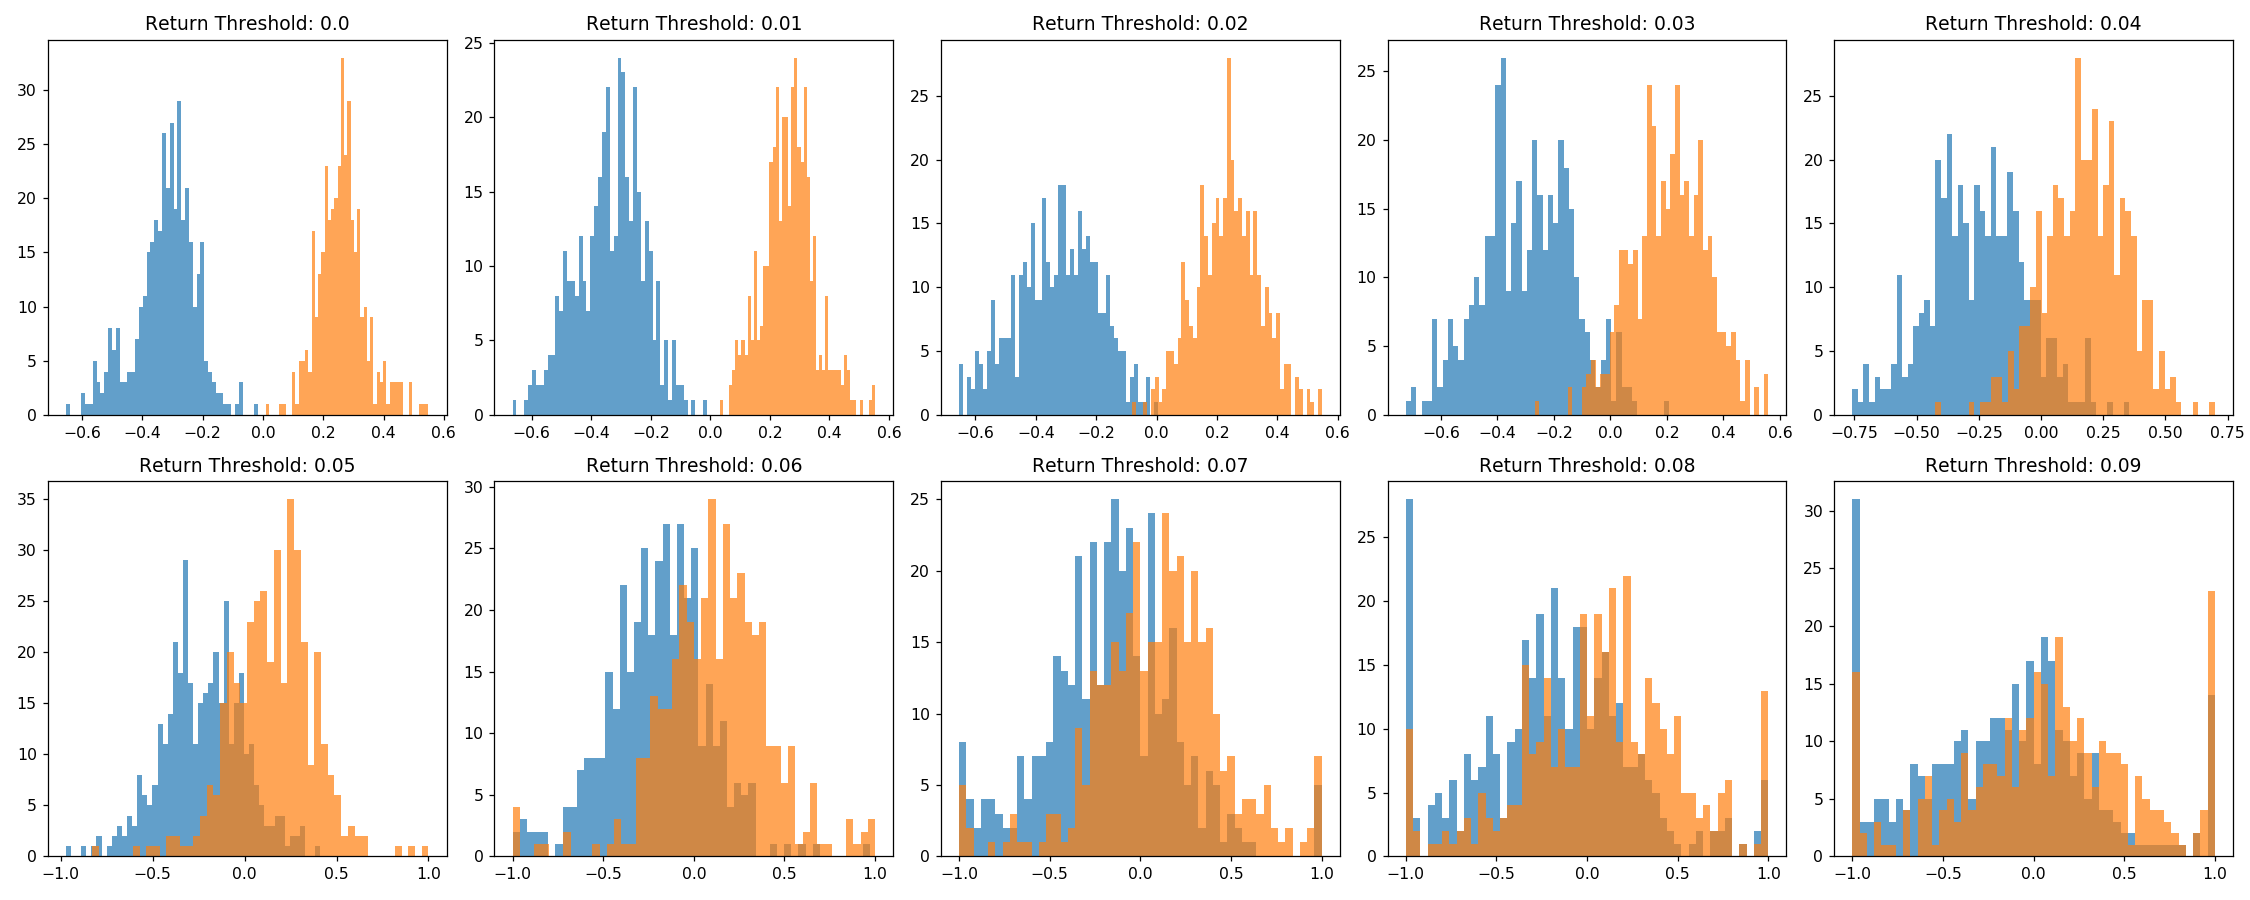

C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: Ru

In [63]:
corr_dataframe = pd.DataFrame()
cutoff_list = np.arange(0,0.1, 0.01)
nrows = 2
ncols = 5
temp_matrix = cutoff_list.reshape(nrows,ncols)

fig, ax = plt.subplots(nrows,ncols, figsize=(20,8))
for k in range(nrows):
    for l in range(ncols):
        ## indices
        temp_idx = temp_matrix[k,l]     
        ### Dictionary of high/low returns
        high_returns = {}
        low_returns = {}
        ### Dictionary of Volume_shares returns
        pa_high_returns = {}
        pa_low_returns = {}
        ### Dictionary of Correlations
        corrs = {}
        for symbol in df_returns.columns:
            ###generate returns
            temp_series = df_returns[symbol][1:]
            temp_series_high = temp_series[temp_series>temp_idx]
            temp_series_low = temp_series[temp_series<=-temp_idx]    
            high_returns[symbol] = temp_series_high
            low_returns[symbol] = temp_series_low
            
            #### Select the Volume_sharesout for dates 1 day behind
            temp_high = high_returns[symbol]
            temp_low = low_returns[symbol]

            temp_high = pd.merge(pd.merge(temp_high, df_day_behind1, left_index=True, right_index=True)[[symbol, 'Day Behind 1']], df_price_askhi[symbol], 
                     left_on='Day Behind 1', right_index=True, suffixes=('_x', ''))[symbol].values

            temp_low = pd.merge(pd.merge(temp_low, df_day_behind1, left_index=True, right_index=True)[[symbol, 'Day Behind 1']], df_price_askhi[symbol], 
                     left_on='Day Behind 1', right_index=True, suffixes=('_x', ''))[symbol].values

            pa_high_returns[symbol] = temp_high
            pa_low_returns[symbol] = temp_low    

            ### Generate the Correlations between the Returns & the Volume/Sharesout on the dates 1 day behind
            ret_high = high_returns[symbol]
            pa_high = pa_high_returns[symbol]

            ret_low = low_returns[symbol]
            pa_low = pa_low_returns[symbol]    

            temp_corr_high = np.corrcoef(ret_high, pa_high)[0, 1]
            temp_corr_low = np.corrcoef(ret_low, pa_low)[0, 1]    
            corrs[symbol] = [temp_corr_high, temp_corr_low]    


        high_corrs = []
        low_corrs = []
        for key, value in corrs.items():
            high_corrs.append(value[0])
            low_corrs.append(value[1])
            
        ### plot the histogram
        ax[k,l].hist(high_corrs, label='Positive Return Dates', bins=50, alpha=0.7)
        ax[k,l].hist(low_corrs, label='Negative Return Dates', bins=50, alpha=0.7)
        ax[k,l].set_title('Return Threshold: {}'.format(temp_idx))
#plt.legend()
plt.tight_layout()
plt.show()  

### 5 Days behind

<IPython.core.display.Javascript object>


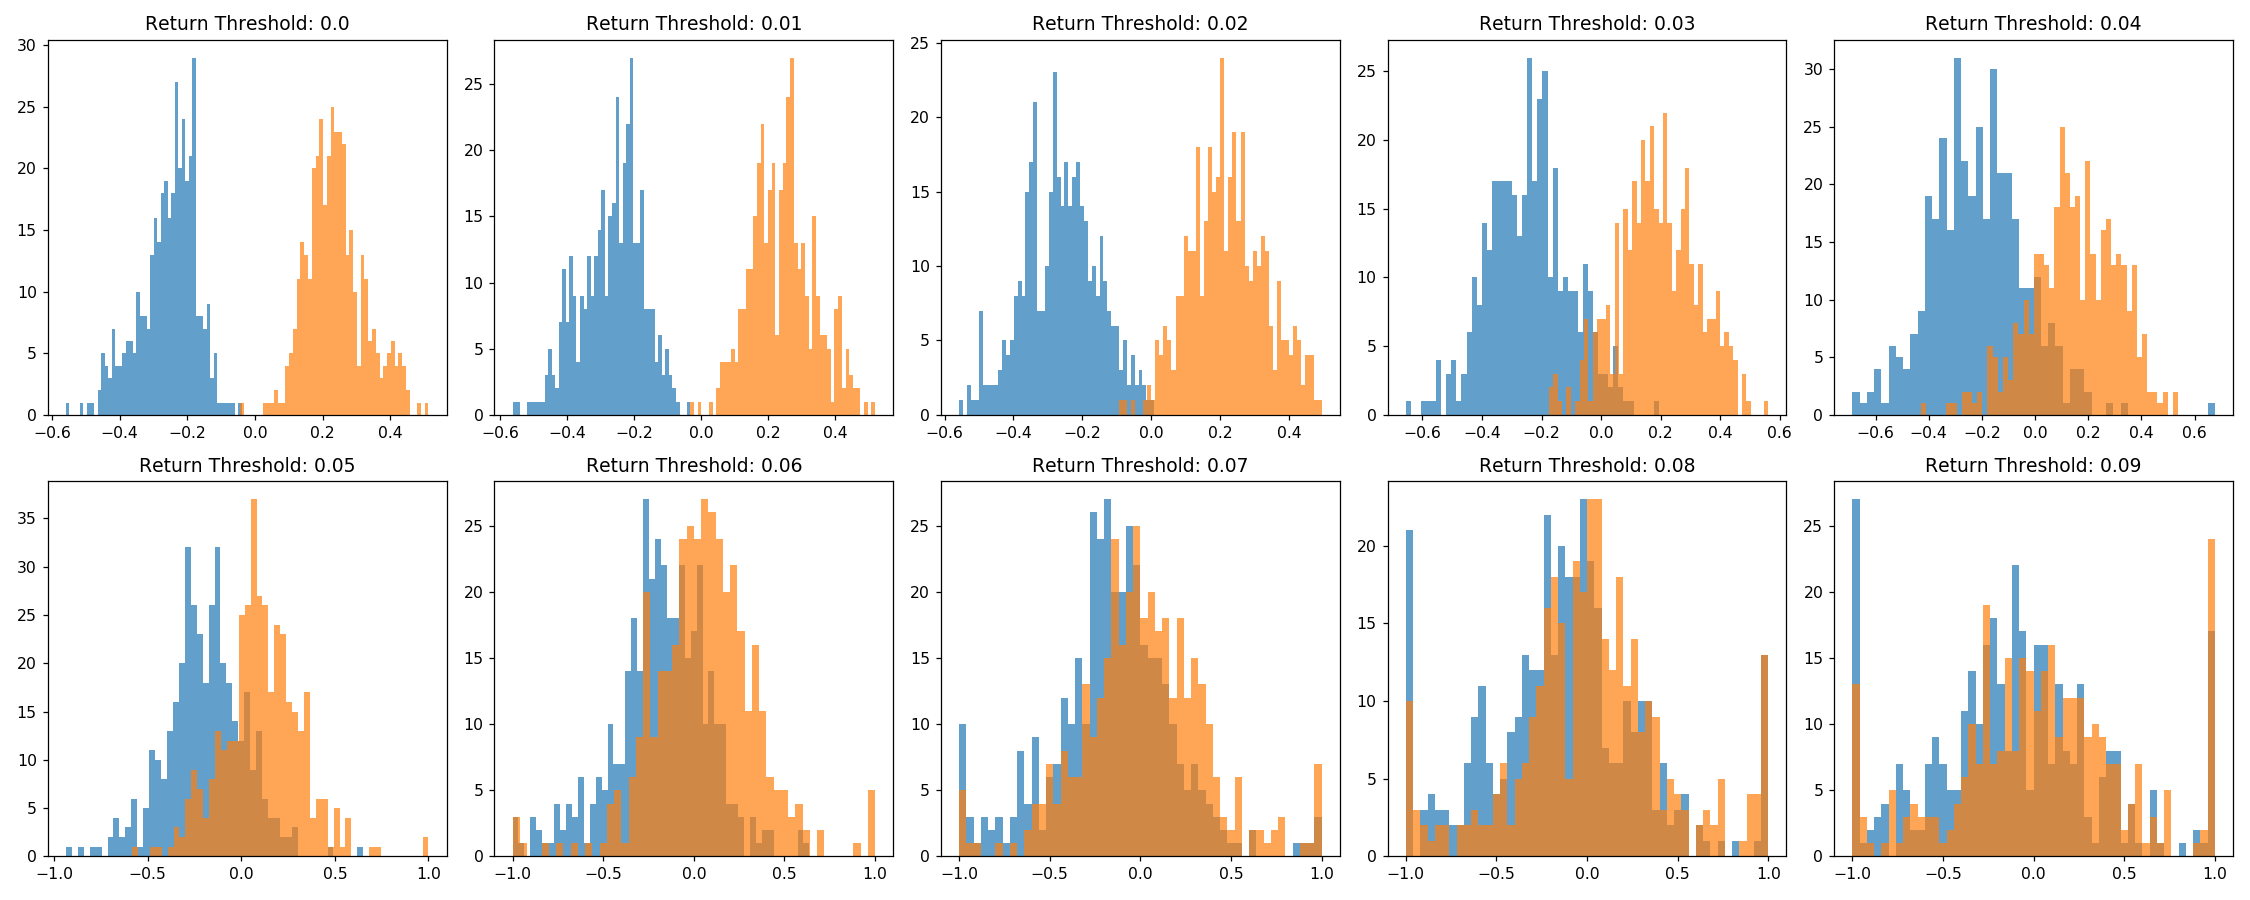

In [65]:
corr_dataframe = pd.DataFrame()
cutoff_list = np.arange(0,0.1, 0.01)
nrows = 2
ncols = 5
temp_matrix = cutoff_list.reshape(nrows,ncols)

fig, ax = plt.subplots(nrows,ncols, figsize=(20,8))
for k in range(nrows):
    for l in range(ncols):
        ## indices
        temp_idx = temp_matrix[k,l]     
        ### Dictionary of high/low returns
        high_returns = {}
        low_returns = {}
        ### Dictionary of Volume_shares returns
        pa_high_returns = {}
        pa_low_returns = {}
        ### Dictionary of Correlations
        corrs = {}
        for symbol in df_returns.columns:
            ###generate returns
            temp_series = df_returns[symbol][5:]
            temp_series_high = temp_series[temp_series>temp_idx]
            temp_series_low = temp_series[temp_series<=-temp_idx]    
            high_returns[symbol] = temp_series_high
            low_returns[symbol] = temp_series_low
            
            #### Select the Volume_sharesout for dates 1 day behind
            temp_high = high_returns[symbol]
            temp_low = low_returns[symbol]

            temp_high = pd.merge(pd.merge(temp_high, df_day_behind5, left_index=True, right_index=True)[[symbol, 'Day Behind 5']], df_price_askhi[symbol], 
                     left_on='Day Behind 5', right_index=True, suffixes=('_x', ''))[symbol].values

            temp_low = pd.merge(pd.merge(temp_low, df_day_behind5, left_index=True, right_index=True)[[symbol, 'Day Behind 5']], df_price_askhi[symbol], 
                     left_on='Day Behind 5', right_index=True, suffixes=('_x', ''))[symbol].values

            pa_high_returns[symbol] = temp_high
            pa_low_returns[symbol] = temp_low    

            ### Generate the Correlations between the Returns & the Volume/Sharesout on the dates 1 day behind
            ret_high = high_returns[symbol]
            pa_high = pa_high_returns[symbol]

            ret_low = low_returns[symbol]
            pa_low = pa_low_returns[symbol]    

            temp_corr_high = np.corrcoef(ret_high, pa_high)[0, 1]
            temp_corr_low = np.corrcoef(ret_low, pa_low)[0, 1]    
            corrs[symbol] = [temp_corr_high, temp_corr_low]    


        high_corrs = []
        low_corrs = []
        for key, value in corrs.items():
            high_corrs.append(value[0])
            low_corrs.append(value[1])
            
        ### plot the histogram
        ax[k,l].hist(high_corrs, label='Positive Return Dates', bins=50, alpha=0.7)
        ax[k,l].hist(low_corrs, label='Negative Return Dates', bins=50, alpha=0.7)
        ax[k,l].set_title('Return Threshold: {}'.format(temp_idx))
#plt.legend()
plt.tight_layout()
plt.show()  

### Plot correlations









Batch 0


<IPython.core.display.Javascript object>


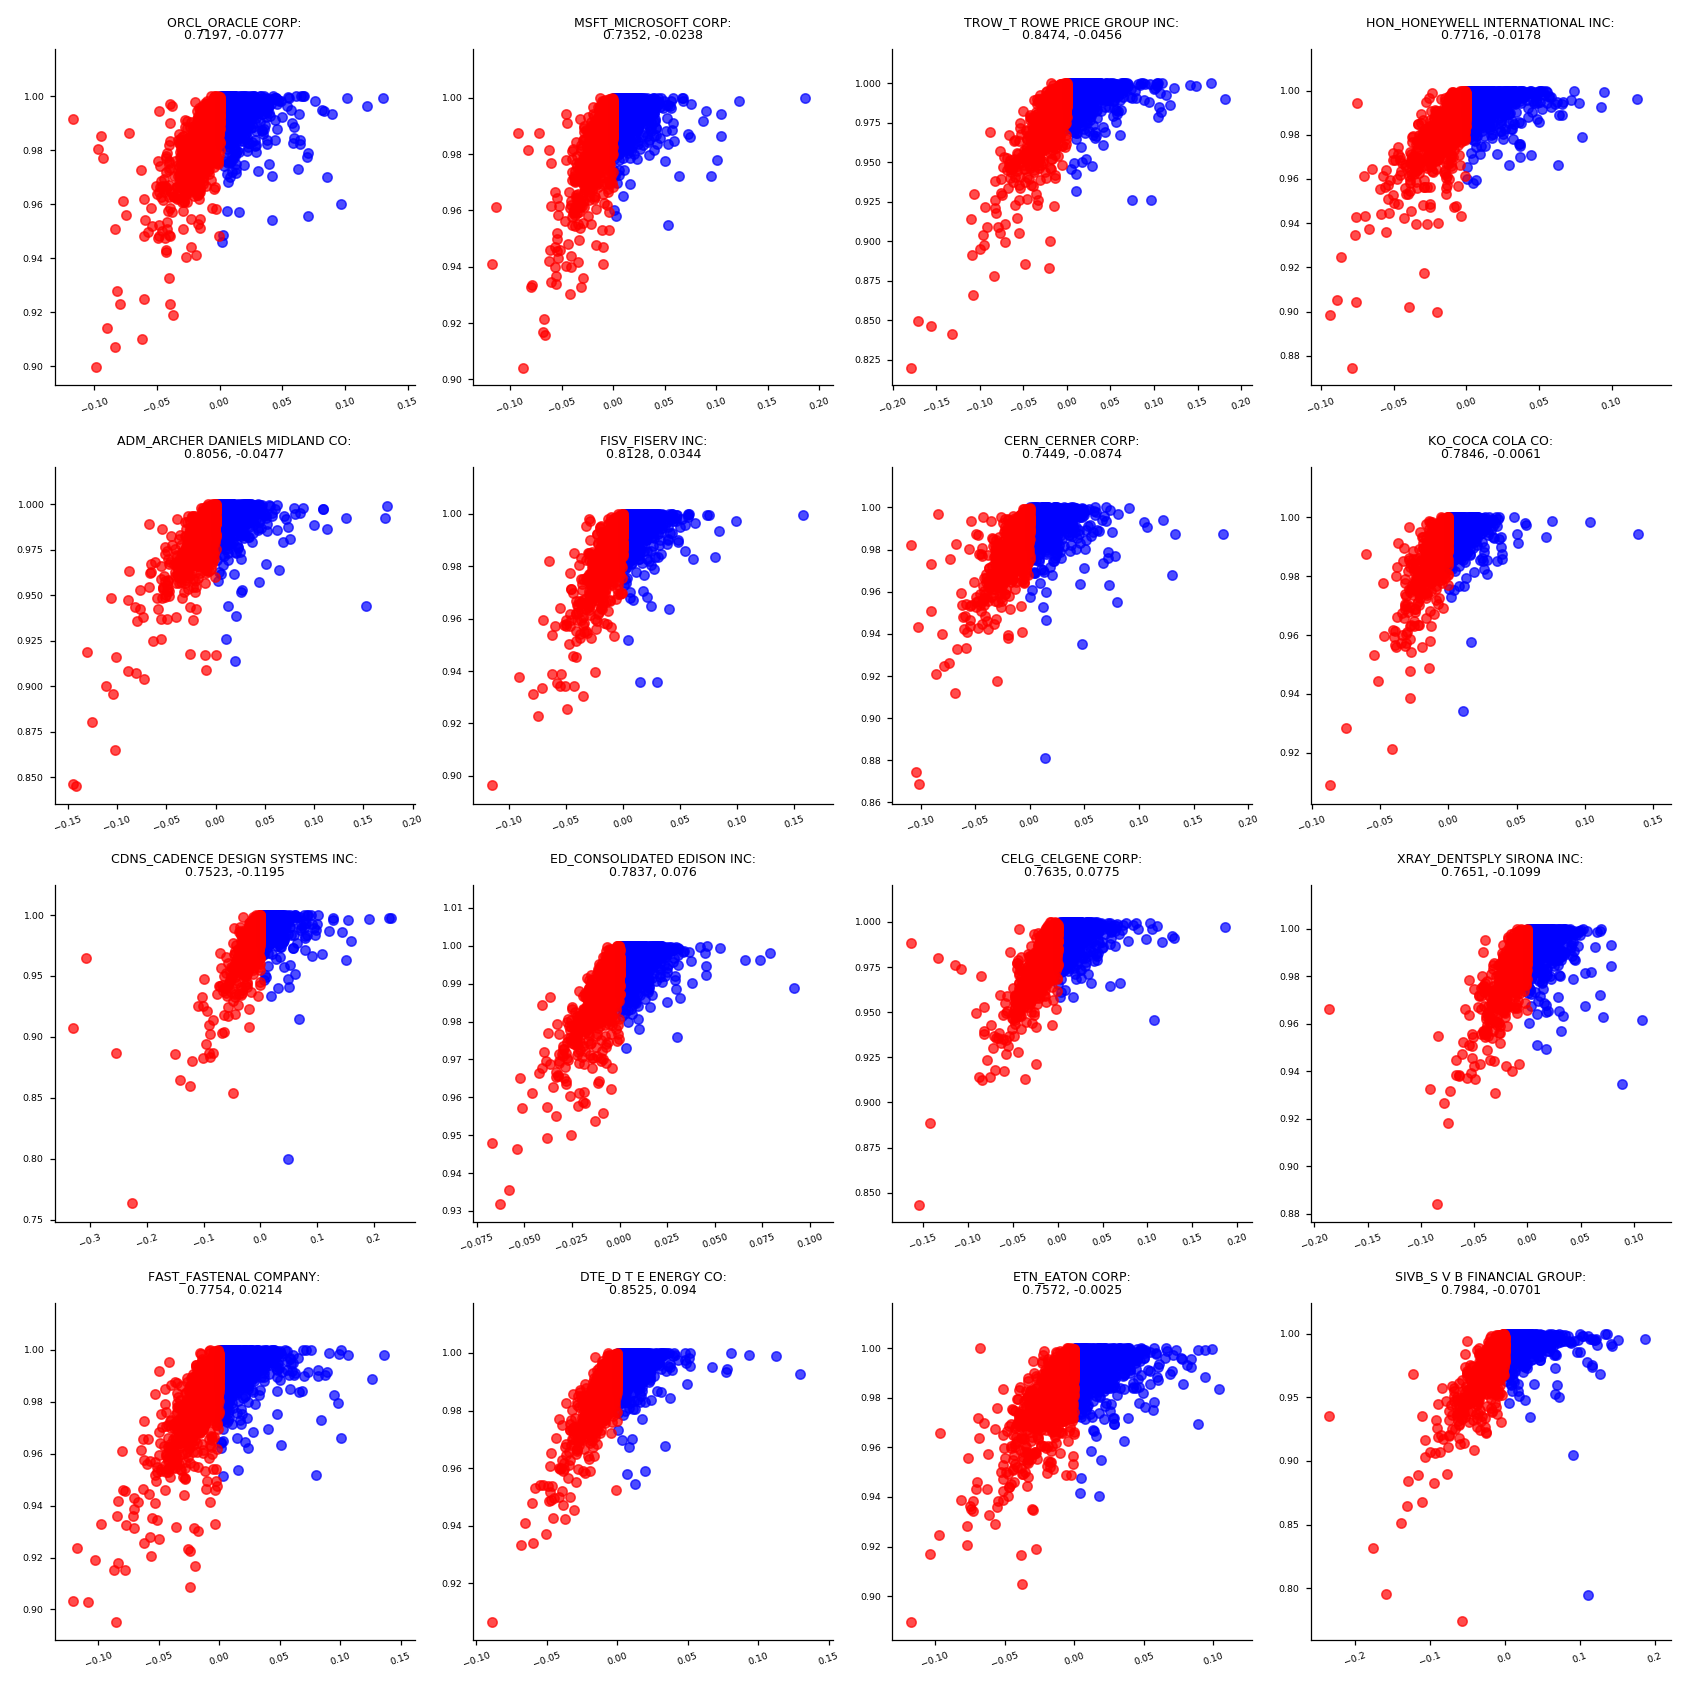

In [12]:
#sup_title_font =15
sub_title_font =10
title_font = 10
legend_font =8
axis_font = 8
tick_rotation = 20
black_dot = 2
red_dot = 5


### matrix of subplots
n_cols = 2
n_rows = 16
#n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_rows))#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20
black_dot = 3
blue_dot = 1
red_dot = 5


### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_price.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_price.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    
    ### instantiage
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(15,15))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
             
            temp_corr = corrs[symbol]
            temp_color = []
            for value in temp_corr:
                if value <= 0.4:
                    temp_color.append('blue')
                elif value <= 0.7: 
                    temp_color.append('yellow')
                else:
                    temp_color.append('red')
               
            ### PLOT: Low Correlations 
            wm = ax[k,l].scatter(high_returns[symbol], pa_high_returns[symbol], 
                       color=temp_color[0], alpha=0.7)             
            ### PLOT: High Correlations 
            wm = ax[k,l].scatter(low_returns[symbol], pa_low_returns[symbol], 
                       color=temp_color[1], alpha=0.7)             
            
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title('{}:\n{}, {}'.format(symbol, round(corrs[symbol][1], 4), round(corrs[symbol][0], 4)), fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([0.7, 1.02])            
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
#     leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
#                #title='Worst Trading Days', title_fontsize=25, 
#                bbox_to_anchor=(1.0, 0.97), 
#                prop={'size':legend_font})#, fontsize=sup_title_font)
#     leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    break
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.)


### leftovers









Batch 0


<IPython.core.display.Javascript object>


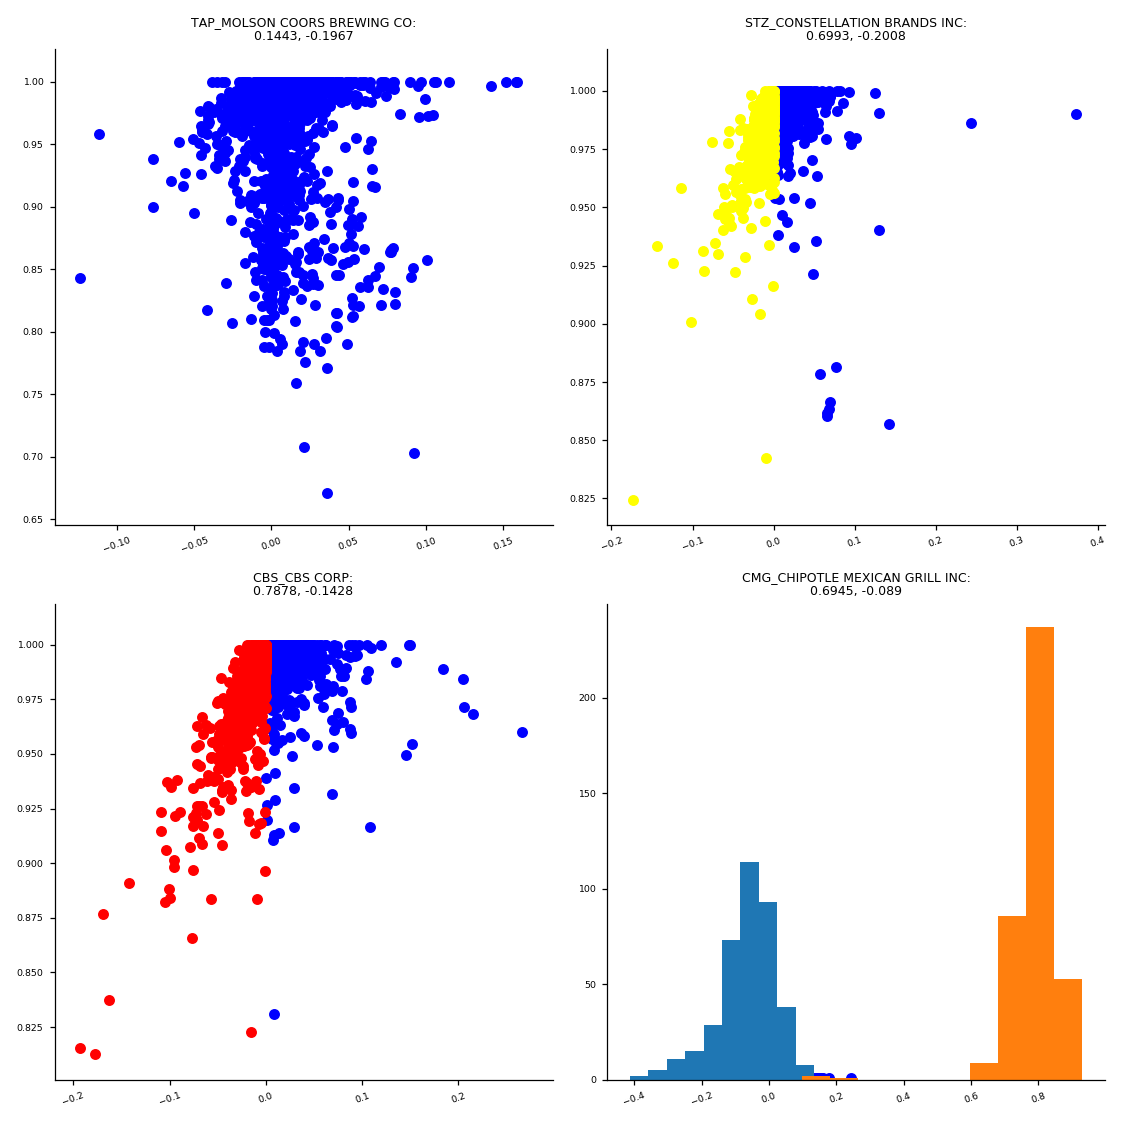

In [14]:
#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20

### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_price.columns)
    #print(lower, upper)
    temp_list = df_returns.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    
    ### instantiage
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(10,10))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
             
            temp_corr = corrs[symbol]
            temp_color = []
            for value in temp_corr:
                if abs(value) <= 0.4:
                    temp_color.append('blue')
                elif abs(value) <= 0.7: 
                    temp_color.append('yellow')
                else:
                    temp_color.append('red')
               
            ### PLOT: Low Correlations 
            wm = ax[k,l].scatter(high_returns[symbol], pa_high_returns[symbol], 
                       color=temp_color[0])             
            ### PLOT: High Correlations 
            wm = ax[k,l].scatter(low_returns[symbol], pa_low_returns[symbol], 
                       color=temp_color[1])             
            
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title('{}:\n{}, {}'.format(symbol, round(corrs[symbol][1], 4), round(corrs[symbol][0], 4)), fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([0.7, 1.02])            
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
#     leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
#                #title='Worst Trading Days', title_fontsize=25, 
#                bbox_to_anchor=(1.0, 0.97), 
#                prop={'size':legend_font})#, fontsize=sup_title_font)
#     leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    break

<IPython.core.display.Javascript object>


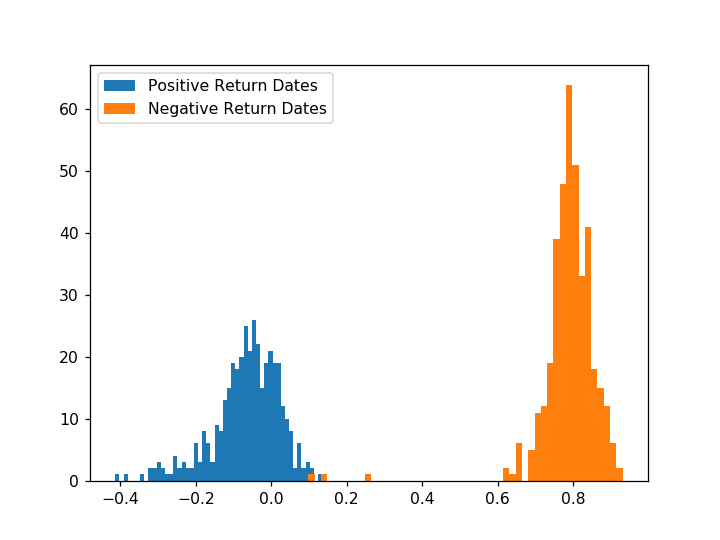